In [1]:
import numpy as np
import matplotlib.pyplot as plt

Approximate the function f(x) = sin(pix) + e^(-x)
Use the evaluation points x =[0:0.1:10 and plot this curve, which is the curve you want to fit.

In [2]:
#Problem 4.1
x_points = np.arange(0, 10.1, 0.1) #generate the x values from 0 to 10 with 0.1 step size

In [3]:
#plug in x values to the function
y_points = [np.sin(np.pi * x) + np.exp(-x) for x in x_points]

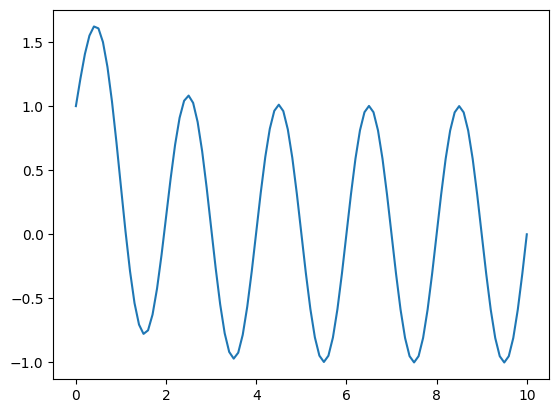

<Figure size 640x480 with 0 Axes>

In [4]:
#plot the curve using actual function
plt.plot(x_points, y_points) #exact curve.
plt.show()
plt.savefig('sin(pix)+e^(-x).png')
plt.clf()

In [5]:
def my_langrange(x, y, x_val):
    '''
        x: list of x values
        y: list of y values
        x_val: point to evaluate
    '''
    n = len(x) #get the length of x values
    y_val = 0
    for i in range(n):
        l = 1
        for j in range(n):
            if i != j:
                l *= (x_val - x[j]) / (x[i] - x[j]) #calculate the lagrange polynomial
        y_val += l * y[i] #evaluate the lagrange polynomial
    return y_val

In [6]:
def newton_divided_difference(x, y):
    '''
    Calculates the coefficients of the Newton polynomial using divided differences.

    x: list of x values
    y: list of y values
    Returns: list of coefficients of the polynomial
    '''
    n = len(x)
    F = np.zeros((n, n))
    for i in range(n):
        F[i][0] = y[i]
    for i in range(1, n):
        for j in range(1, i + 1):
            F[i][j] = (F[i][j - 1] - F[i - 1][j - 1]) / (x[i] - x[i - j])
    co_eff = [F[i][i] for i in range(n)]
    return co_eff


def newton_polynomial(co_eff, x_values, x):
    '''
    Evaluates the Newton polynomial at a given x.

    co_eff: coefficients of the Newton polynomial
    x_values: original x values used to generate the polynomial
    x: point at which to evaluate the polynomial
    Returns: y value at the given x
    '''
    n = len(x_values)
    result = co_eff[0]
    for i in range(1, n):
        term = co_eff[i]
        for j in range(i):
            term *= (x - x_values[j])
        result += term
    return result

In [7]:
def naive_interpolation(x, y):
    '''
        x: list of x values
        y: list of y values
        co_eff: list of coefficients of the polynomial
    '''
    #set up the Vandermonde matrix
    n = len(x) #get the length of x values
    V = np.zeros((n, n)) #Initialize the van
    # vendermonde matrix. np.zeros(n, n) => n x n matrix with zeros!
    for i in range(n):
        for j in range(n):
            V[i][j] = x[i] ** j #fill in the vandermonde matrix with x values raised to the power of j
    co_eff = np.linalg.solve(V, y) #calculate the coefficients. (ax = b) using numpy linear algebra solver
    return co_eff

In [8]:
def my_poly_eval(a, x):
    '''
        a: coefficients of the polynomial
        x: point to evaluate
    '''
    n = len(a) #get the length of the coefficients
    y = 0
    for i in range(n):
        y += a[i] * (x ** i) #evaluate the polynomial
    return y

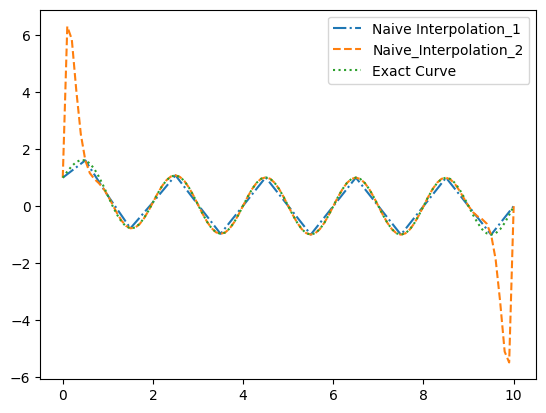

<Figure size 640x480 with 0 Axes>

In [9]:
#Problem 4.2
#Take the interpolation points x_int = [0:0.5:10], save y_int=f(x_int). Use this data set, apply the naive method to fit data.
#Evaluate the polynomial first at x_int, then at x_points, compare it with the exact curve y.

x_int = np.arange(0, 10.5, 0.5) #generate the x values from 0 to 10 with 0.5 step size
y_int = [np.sin(np.pi * x) + np.exp(-x) for x in x_int]
#apply the naive interpolation to fit the data
co_eff = naive_interpolation(x_int, y_int)

#evaluate the polynomial at the interpolation points
y_val = [my_poly_eval(co_eff, x) for x in x_int]

#x_points interpolation using naive interpolation
co_eff_2 = naive_interpolation(x_int, y_int)

#evaluate the polynomial at the given x values
y_val_2 = [my_poly_eval(co_eff_2, x) for x in x_points]

#compare the exact curve with the naive interpolation
#Save three plots in one figure.

plt.plot(x_int, y_val, label='Naive Interpolation_1', linestyle='-.')
plt.plot(x_points, y_val_2, label='Naive_Interpolation_2', linestyle='--')
plt.plot(x_points, y_points, label='Exact Curve', linestyle=':')
plt.legend()
plt.show()
plt.savefig('comparison_naive_interpolation.png')
plt.clf()

Naive Interpolation_1 (Blue Dashed Line): This curve closely follows the Exact Curve (Green Dotted Line), particularly in the interior of the interval. This similarity occurs because Naive Interpolation_1 uses the evaluation points as its interpolation points. These points are accurate and sufficient to recreate the exact curve without significant deviation. Hence, the blue and green lines almost overlap.

Naive Interpolation_2 (Orange Dashed Line): While this curve also follows the exact curve in the middle of the interval, it exhibits a large deviation, especially at the edges. This edge error occurs due to poor interpolation conditions near the boundaries. The interpolation points used by Naive Interpolation_2 likely cause the method to struggle with capturing the behavior at the interval's end, resulting in the drastic error around x=0 and x=10.

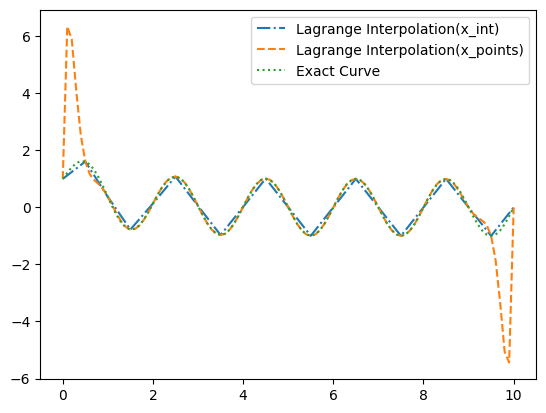

<Figure size 640x480 with 0 Axes>

In [10]:
#Do the lagrange polynomial this time
#Problem 4.3

#Repeat the same process with the Lagrange method.
y_int = [np.sin(np.pi * x) + np.exp(-x) for x in x_int]
y_lagrange_int = [my_langrange(x_int, y_int, x) for x in x_int]
y_lagrange_points = [my_langrange(x_int, y_int, x) for x in x_points]
#x_int_polynomial
plt.plot(x_int, y_lagrange_int, label='Lagrange Interpolation(x_int)', linestyle='-.')
#x_points_polynomial
plt.plot(x_points, y_lagrange_points, label='Lagrange Interpolation(x_points)', linestyle='--')
#exact_curve
plt.plot(x_points, y_points, label='Exact Curve', linestyle=':')
plt.legend()
plt.show()
plt.savefig('comparison_lagrange_interpolation.png')
plt.clf()

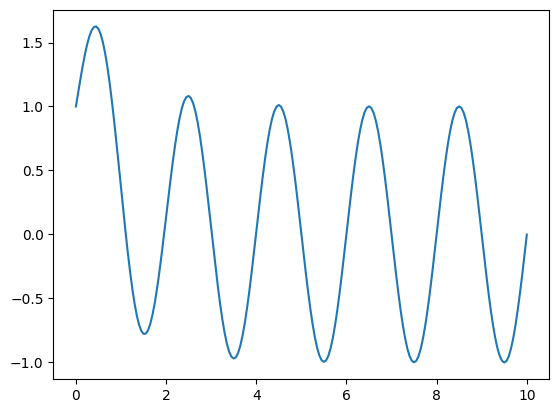

<Figure size 640x480 with 0 Axes>

In [11]:
#Problem 4.4
#Now try x_int1 = [0:0.05:10], and apply naive method. Evaluate at x_int1.

x_int1 = np.arange(0, 10.05, 0.05) #generate the x values from 0 to 10 with 0.05 step size
y_int1 = [np.sin(np.pi * x) + np.exp(-x) for x in x_int1]
naive_x_int1_coeff = naive_interpolation(x_int1, y_int1)
plt.plot(x_int1, [my_poly_eval(naive_x_int1_coeff, x) for x in x_int1], label='Naive Interpolation(x_int1)')
plt.show()
plt.savefig('./naive_interpolation_x_int1.png')
plt.clf()

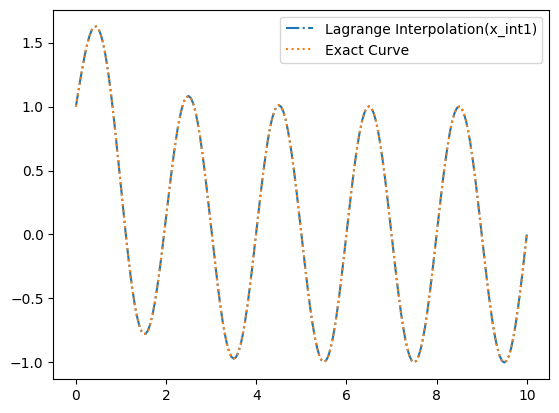

<Figure size 640x480 with 0 Axes>

In [12]:
#Problem 4.5
lagrange_y_int1 = [my_langrange(x_int1, y_int1, x) for x in x_int1]
exact_y_int1 = [np.sin(np.pi * x) + np.exp(-x) for x in x_int1]
plt.plot(x_int1, lagrange_y_int1, label='Lagrange Interpolation(x_int1)', linestyle='-.')
plt.plot(x_int1, exact_y_int1, label='Exact Curve', linestyle=':')
plt.legend()
plt.show()
plt.savefig('./lagrange_interpolation_x_int1.png')
plt.clf()

It is same as exact curve. Because it uses the interpolation points as evaluation points.

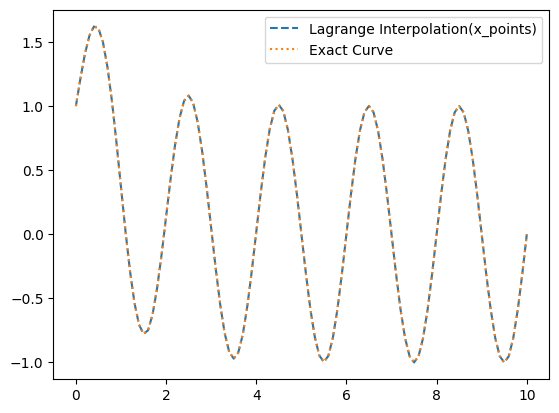

<Figure size 640x480 with 0 Axes>

In [13]:
#Problem 4.6
#Use the lagrange polynomial you get from part 5, and evaluate it at x, compare with the exact curve.
lagrange_y_points = [my_langrange(x_int1, y_int1, x) for x in x_points]
plt.plot(x_points, lagrange_y_points, label='Lagrange Interpolation(x_points)', linestyle='--')
plt.plot(x_points, y_points, label='Exact Curve', linestyle=':')
plt.legend()
plt.show()
plt.savefig('./lagrange_interpolation_x_points.png')
plt.clf()

It has the same description

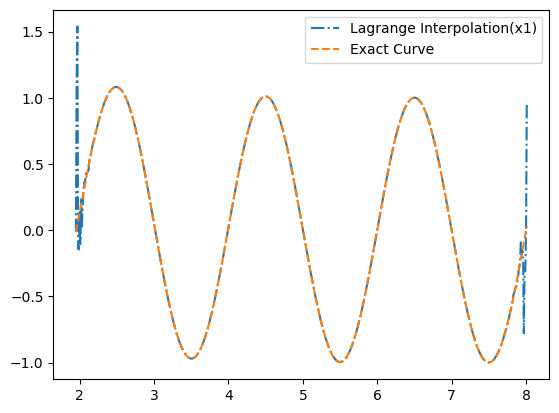

<Figure size 640x480 with 0 Axes>

In [14]:
#Problem 4.7
#evaluate the lagrange polynomial at x1=[1.95:0.01:8.01], compare it with the exact plot. What is the observation now?
x1 = np.arange(1.95, 8.02, 0.01) #[1.95:0.01:8.01]
# lagrange_y_x1 = [my_langrange(x1, [np.sin(np.pi * x) + np.exp(-x) for x in x1], x) for x in x1]
lagrange_y_points = [my_langrange(x_int1, y_int1, x) for x in x1]
plt.plot(x1, lagrange_y_points, label='Lagrange Interpolation(x1)', linestyle='-.')
plt.plot(x1, [np.sin(np.pi * x) + np.exp(-x) for x in x1], label='Exact Curve', linestyle='--')
plt.legend()
plt.show()
plt.savefig('./lagrange_interpolation_x1.png')
plt.clf()
#TODO()
#Can yhou make some guesses to interpret this phenoemenon?

Lagrange Interpolation (Blue Dash-Dotted Line): This curve represents the result of applying Lagrange interpolation to the given points. However, the interpolation shows significant inaccuracies, particularly near the edges of the interval. Noticeable oscillations occur around x=2 and x=8, which is a common problem in polynomial interpolation, especially with Lagrange's method. This issue, known as Runge's phenomenon, arises because polynomial interpolation tends to oscillate excessively near the boundaries when using high-degree polynomials or unevenly spaced points.

Exact Curve (Orange Dashed Line): This curve represents the true function, smoothly oscillating between x = 2 and x = 8 in a regular sine-like pattern. The exact curve behaves consistently across the interval and serves as a reference for evaluating the accuracy of the interpolation.